In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random_variable import RandomVariable, gaussian_distribution

Test random variable implementations

In [2]:
def test_var(var, n=1000):
    print(var)
    print(f"Expantacy(n={n}) = ", var.expantacy(n))
    print(f"Variance(n={n}) = ", var.variance(n))
    print(f"std(n={n}) = ", var.std(n))

In [3]:
print("Constante variable")
const = RandomVariable.constant_var(1,"1")
test_var(const)


Constante variable
1 :
   1
   1
   1
   1
Expantacy(n=1000) =  1.0
Variance(n=1000) =  0.0
std(n=1000) =  0.0


In [5]:
print("Random variable with normal law")
X = RandomVariable("X", gaussian_distribution(mu=-1.85, sigma=3.14))
test_var(X)

Random variable with normal law
X :
   0.507249249759226
   -4.81271945245804
   2.67788536301649
   2.559900698587184
Expantacy(n=1000) =  -1.96796760926127
Variance(n=1000) =  9.653304080000748
std(n=1000) =  3.128834809111392


In [6]:
print("nuplet of the random variable above")
X_n = X.nuplet(3)
test_var(X_n)

nuplet of the random variable above
X_3 :
   [-0.95042431 -4.97696534  4.39425767]
   [-1.89229998  1.19500721 -2.72475049]
   [-5.8819597  -2.01386478 -3.55736879]
   [ 4.88677295 -3.10738906 -2.30896306]
Expantacy(n=1000) =  [-1.72979829 -1.98603592 -2.02083992]
Variance(n=1000) =  [ 9.54743856 10.35596259  9.49018675]
std(n=1000) =  [3.03643317 3.13375013 3.08140025]


In [7]:
X_minus_X = X - X
test_var(X_minus_X)

X-X :
   -3.472208231754176
   -1.986393608914638
   -2.4689197052846454
   0.4703772276177407
Expantacy(n=1000) =  -0.09672804096348467
Variance(n=1000) =  19.687485611219767
std(n=1000) =  4.464259758256217


In [8]:
X_plus_X = X + X
test_var(X_plus_X)

X+X :
   -5.61911939034152
   -10.857068382305767
   -3.3204375567466906
   0.9101048518259631
Expantacy(n=1000) =  -3.5092544537555805
Variance(n=1000) =  18.807837327800947
std(n=1000) =  4.450259180107861


In [9]:
X_pow_2 = X**2
test_var(X_pow_2)

X^2 :
   21.363431122480943
   19.695846877284414
   0.28980448774810735
   2.5777013721554805
Expantacy(n=1000) =  12.82510024021553
Variance(n=1000) =  316.4897803877654
std(n=1000) =  17.511903882440517


Estimation of distribution of Gaussian random variable 

In [12]:
print("Random variable with normal law")
mu    = 0
sigma = 1

var = RandomVariable("X", gaussian_distribution(mu=mu, sigma=sigma))
print(var)

Random variable with normal law
X :
   -1.6934623181213544
   -0.7638662251817366
   1.175001953178898
   -1.3536389659500416


In [13]:
t = np.linspace(-4,4,500)
real_density = np.exp(-(t-mu)**2 / 2 / sigma**2) / np.sqrt(2 * np.pi) / sigma
gaussian_kernel = lambda x: np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)

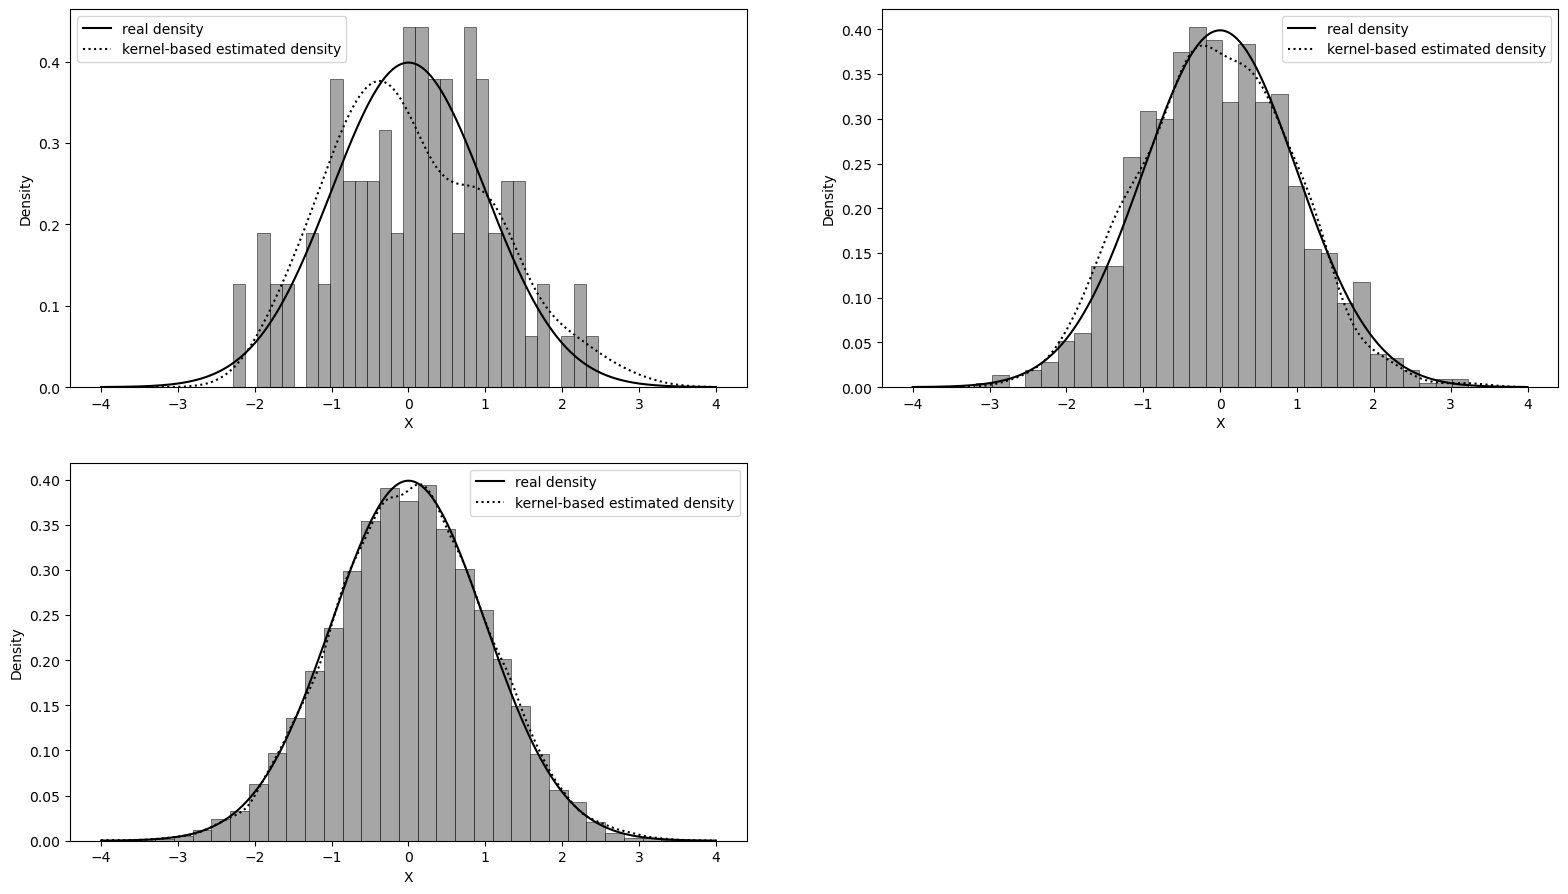

In [ ]:
plt.figure(figsize=(19.20,10.80))
for i in range(1, 4):
    N = 10**(i+1)
    ax = plt.subplot(2,2,i)
    estimated_density = var.estimated_density(x=t, kernel=gaussian_kernel, n=N)
    ax.plot(t, real_density, c="black", label="real density")
    ax.plot(t, estimated_density, c="black", linestyle="dotted", label="kernel-based estimated density")
    var.plot(ax=ax, n=N)
    ax.legend()
plt.show()